In [1]:
import CNN_2_0 as parent

/Users/tien/Documents/GitHub/promoter-sequence-transcription-rates/Synth_CURE_env/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
# File path
filepath = '../Data/41467_2022_32829_MOESM5_ESM.csv'

# Load and preprocess data
X, y, df = parent.load_and_preprocess_data(filepath)

In [3]:
# Encode sequences
X_encoded, max_length = parent.encode_sequences(X)

In [4]:
# Train-test split
X_train, X_test, y_train, y_test = parent.train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [5]:
# Only run if the model has not been trained before

# Build and train model
model = parent.build_model(input_shape=X_encoded.shape[1:])
history = parent.train_model(model, X_train, y_train, X_test, y_test)

# Save model
parent.save_model(model, 'CNN_1_4.keras')

Epoch 1/150


/Users/tien/Documents/GitHub/promoter-sequence-transcription-rates/Synth_CURE_env/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


337/337 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.7244 - val_loss: 0.2058
Epoch 2/150
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2006 - val_loss: 0.1816
Epoch 3/150
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1845 - val_loss: 0.1660
Epoch 4/150
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1675 - val_loss: 0.1659
Epoch 5/150
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1603 - val_loss: 0.1498
Epoch 6/150
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1484 - val_loss: 0.1515
Epoch 7/150
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1570 - val_loss: 0.1508
Epoch 8/150
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1410 - val_loss: 0.1516
Epoch 9/150
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1410 - val_loss: 0.1631
Epoch 10/150
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1357 - val_loss: 0.1514
Epoch 11/150
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1321 - val_loss: 0.1665
Epoch 12/150
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [6]:
# Load model if needed, if not, this will load the just-saved model

model = parent.load_saved_model('CNN_1_4.keras')

In [7]:
# Evaluate model
loss = parent.evaluate_model(model, X_test, y_test)
print(f'Loss: {loss}')

85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2546
Loss: 0.2448594719171524


In [10]:
# Make predictions
predictions_df = parent.make_predictions(model, X_encoded)

422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


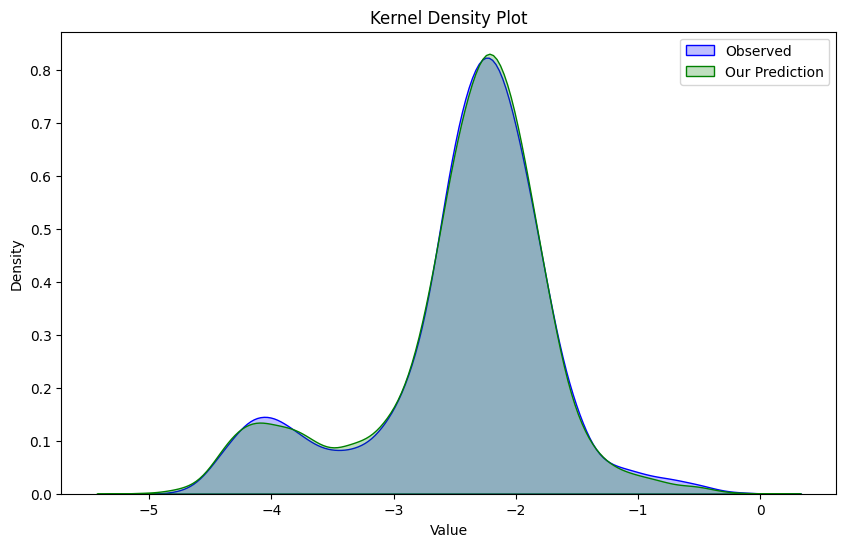

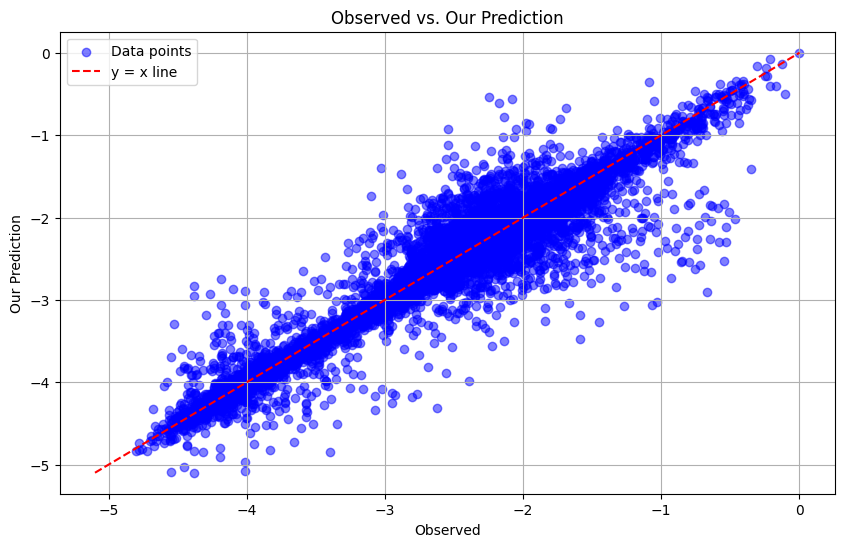

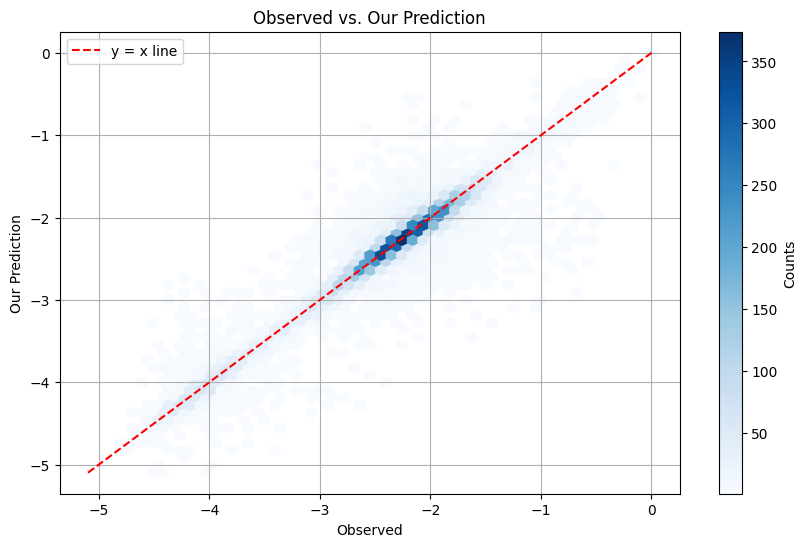

In [11]:
# Plot KDE and scatter plot
parent.plot_kde(df['Observed'], predictions_df['Value'])
parent.plot_scatter(df['Observed'].values, predictions_df['Value'].values)
parent.plot_scatter_density(df['Observed'].values, predictions_df['Value'].values)